# Read the data

In [22]:
import pandas as pd
column_names = ["variance", "skewness", "curtosis", "entropy", "class"]
df = pd.read_csv('/content/data_banknote_authentication.txt',header=None, names=column_names)
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


# EDA and Preprocessing

In [23]:
# Check for missing values
df.isnull().sum()

,0
variance,0
skewness,0
curtosis,0
entropy,0
class,0


In [24]:
# Summary of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [25]:
# Check for duplicate values
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 24


In [26]:
# Remove duplicate values
df = df.drop_duplicates()
print(f"Duplicate rows removed. Number of rows after removal: {len(df)}")

Duplicate rows removed. Number of rows after removal: 1348


In [27]:
# Summary statistics
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
          variance     skewness     curtosis      entropy        class
count  1348.000000  1348.000000  1348.000000  1348.000000  1348.000000
mean      0.445785     1.909039     1.413578    -1.168712     0.452522
std       2.862906     5.868600     4.328365     2.085877     0.497925
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.786650    -1.627000    -1.545600    -2.393100     0.000000
50%       0.518735     2.334150     0.605495    -0.578890     0.000000
75%       2.853250     6.796025     3.199800     0.403863     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000


In [28]:
# Distribution of the target variable
print("\nClass distribution:")
print(df['class'].value_counts())


Class distribution:
class
0    738
1    610
Name: count, dtype: int64


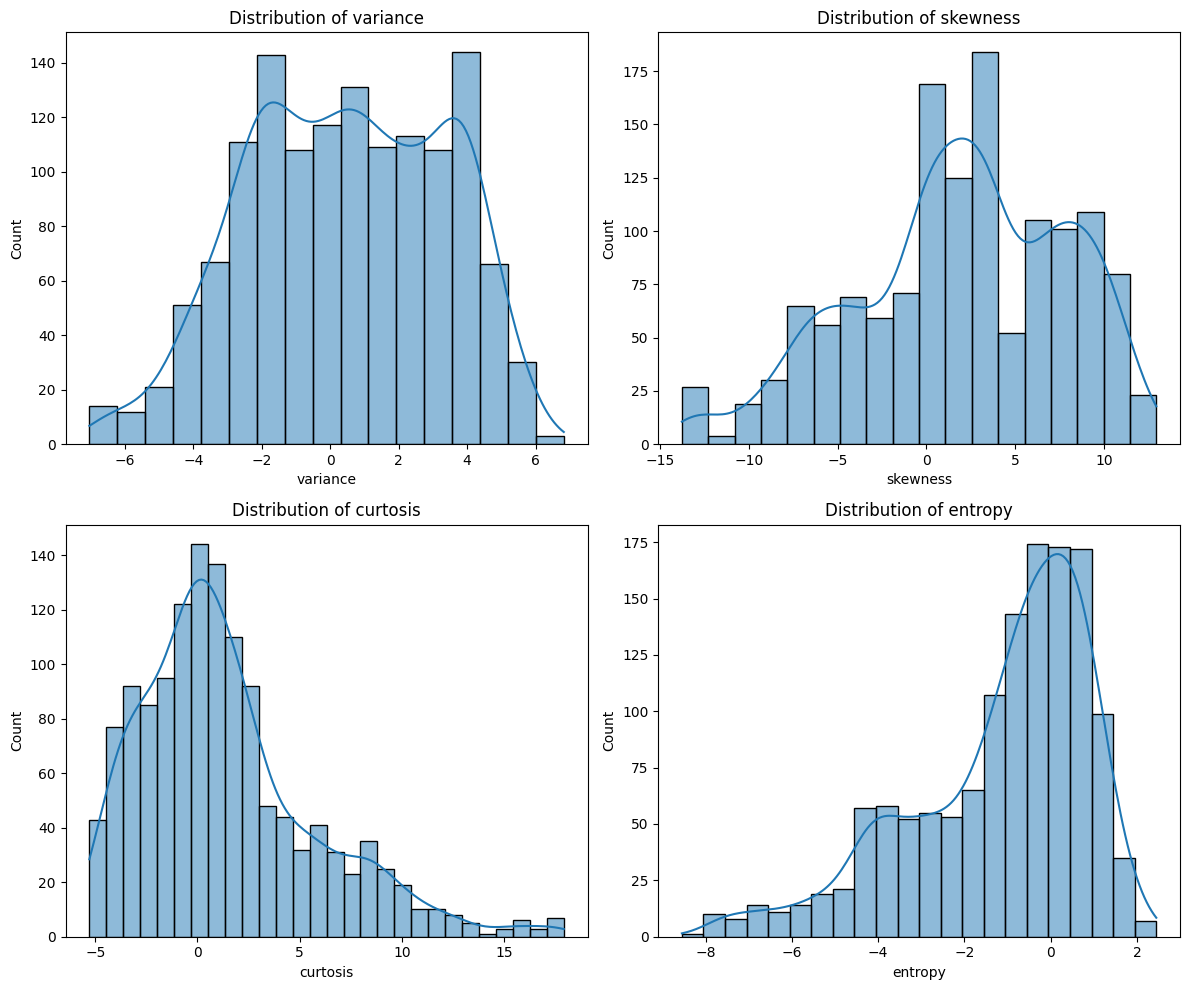

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of each feature
plt.figure(figsize=(12, 10))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

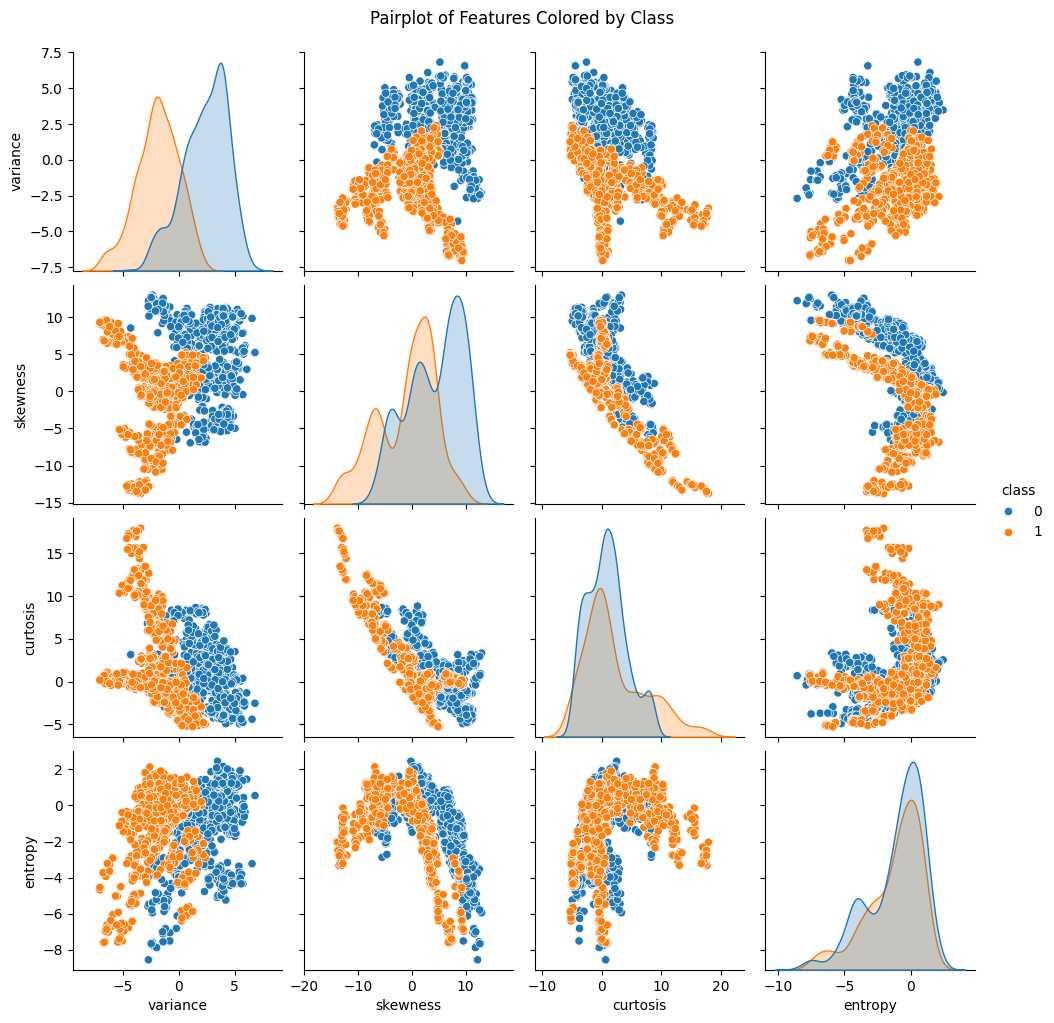

In [30]:
# Visualize the pairwise relationships between features
sns.pairplot(df, hue='class', diag_kind='kde')
plt.suptitle('Pairplot of Features Colored by Class', y=1.02)
plt.show()

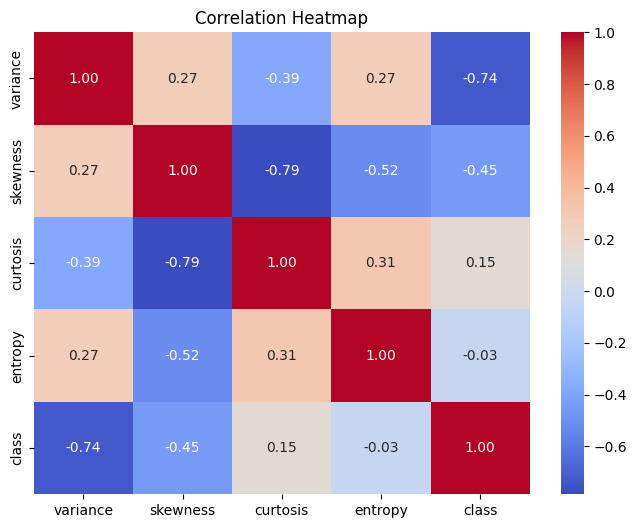

In [31]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Handling Outliers

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Data Cleaning: Handling outliers using Z-Score
z_scores = np.abs(stats.zscore(df.iloc[:, :-1]))
outliers = np.where(z_scores > 3, True, False)
print(f"\nNumber of outliers detected: {np.sum(outliers)}")
df = df[(z_scores < 3).all(axis=1)]
print(f"Number of rows after removing outliers: {len(df)}")


Number of outliers detected: 34
Number of rows after removing outliers: 1314


# Splitting the data

In [33]:
x = df.drop('class', axis=1)
y = df['class']

In [34]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.8)

In [35]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

# Model Selection



In [36]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [37]:
# Model Training and Selection
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

In [38]:
best_model = None
best_accuracy = 0

for model_name, model in models.items():
    print(f"\nTraining and evaluating {model_name}...")
    cv_scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='accuracy')
    mean_cv_score = cv_scores.mean()
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean CV accuracy: {mean_cv_score}")

    # Train the model
    model.fit(xtrain, ytrain)
    trainpred = model.predict(xtrain)
    testpred = model.predict(xtest)

    # Evaluate the model
    train_accuracy = accuracy_score(ytrain, trainpred)
    test_accuracy = accuracy_score(ytest, testpred)

    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")

    # Select the best model based on test accuracy
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_model = model_name

print(f"\nBest model based on testing accuracy: {best_model} with accuracy {best_accuracy}")



Training and evaluating Random Forest...
Cross-validation scores: [0.99052133 0.98571429 1.         0.98095238 0.9952381 ]
Mean CV accuracy: 0.990485217783796
Training Accuracy: 1.0
Testing Accuracy: 1.0

Training and evaluating Gradient Boosting...
Cross-validation scores: [0.99052133 0.98095238 0.9952381  0.98571429 0.9952381 ]
Mean CV accuracy: 0.989532836831415
Training Accuracy: 1.0
Testing Accuracy: 1.0

Training and evaluating SVM...
Cross-validation scores: [0.99052133 1.         1.         1.         1.        ]
Mean CV accuracy: 0.9981042654028436
Training Accuracy: 1.0
Testing Accuracy: 1.0

Training and evaluating K-Nearest Neighbors...
Cross-validation scores: [0.97156398 0.9952381  0.9952381  0.9952381  1.        ]
Mean CV accuracy: 0.991455653351388
Training Accuracy: 0.9980970504281637
Testing Accuracy: 1.0

Training and evaluating Logistic Regression...
Cross-validation scores: [0.97156398 0.99047619 0.9952381  0.99047619 1.        ]
Mean CV accuracy: 0.98955089144662

# Train the Model

In [39]:
# Evaluate the best model
print("\nFinal Model Evaluation:")
model = models[best_model]
model.fit(xtrain, ytrain)


Final Model Evaluation:


RandomForestClassifier(random_state=42)

# Get Predictions

In [40]:
trainpred = model.predict(xtrain)
testpred = model.predict(xtest)

# Evaluate the Model

In [41]:
# Evaluate the model on the training set
print("\nEvaluation on Training Set:")
print("Confusion Matrix:")
print(confusion_matrix(ytrain, trainpred))
print("\nClassification Report:")
print(classification_report(ytrain, trainpred))
print("Accuracy Score:")
print(accuracy_score(ytrain, trainpred))


Evaluation on Training Set:
Confusion Matrix:
[[583   0]
 [  0 468]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       583
           1       1.00      1.00      1.00       468

    accuracy                           1.00      1051
   macro avg       1.00      1.00      1.00      1051
weighted avg       1.00      1.00      1.00      1051

Accuracy Score:
1.0


In [42]:
# Evaluate the model on the test set
print("\nEvaluation on Test Set:")
print("Confusion Matrix:")
print(confusion_matrix(ytest, testpred))
print("\nClassification Report:")
print(classification_report(ytest, testpred))
print("Accuracy Score:")
print(accuracy_score(ytest, testpred))


Evaluation on Test Set:
Confusion Matrix:
[[145   0]
 [  0 118]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1       1.00      1.00      1.00       118

    accuracy                           1.00       263
   macro avg       1.00      1.00      1.00       263
weighted avg       1.00      1.00      1.00       263

Accuracy Score:
1.0
